In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Source: https://github.com/dionyziz/popow/blob/9a75ab28deb5f2165856977ba9a1fce6d1301b6f/experiment-electrum/parse_blockchain.py#L17-L26
def bits_to_target(bits):
    bitsN = (bits >> 24) & 0xff
    bitsBase = bits & 0xffffff
    target = bitsBase << (8 * (bitsN - 3))
    return int(target)

In [51]:
import math

# Define the initial target value
T0 = int(2**224)
print(f"    Initial target = {T0}")

kappa = 256 # Probability space of hash function
num_attempts = 1000000000 # Number of attempts at mining

# bits value at block 809070
# Source: https://whatsonchain.com/block-height/809070
latest_bits = int("180f9105", 16)

latest_target = bits_to_target(latest_bits)
print(f"     Latest target = {latest_target}")

latest_difficulty = math.floor(T0 / latest_target)
print(f" Latest difficulty = {latest_difficulty}")

number_of_values = 50 # Obtain number_of_values block targets

    Initial target = 26959946667150639794667015087019630673637144422540572481103610249216
     Latest target = 381689041369006227340611107166209757887307372212508426240
 Latest difficulty = 70633274066


In [52]:
difficulty_linspace = False
powspace = True
powspace_power = 10

def powspace(start, stop, power, num):
    start = np.power(start, 1/float(power))
    stop = np.power(stop, 1/float(power))
    return np.power( np.linspace(start, stop, num=num), power) 

if difficulty_linspace:
    if powspace:
        block_difficulties = powspace(latest_difficulty, 1, powspace_power, number_of_values)
    else:
        block_difficulties = np.linspace(latest_difficulty, 1, number_of_values)
    block_targets = [math.floor(T0 / difficulty) for difficulty in block_difficulties]
    block_success = [(target / 2**kappa)*num_attempts for target in block_targets]

else: # linspace on targets
    if powspace:
        block_targets = powspace(latest_target, T0, powspace_power, number_of_values)
    else:
        block_targets = np.linspace(latest_target, T0, number_of_values)
    block_difficulties = [T0 / target for target in block_targets]
    block_success = [(target / 2**kappa)*num_attempts for target in block_targets]

# Create DataFrame
data = {'Target': block_targets, 'Difficulty': block_difficulties, 'Success': block_success}
df = pd.DataFrame(data)
print(df)

          Target    Difficulty       Success
0   3.816890e+56  7.063327e+10  3.296331e-12
1   2.970032e+57  9.077324e+09  2.564970e-11
2   1.628362e+58  1.655648e+09  1.406281e-10
3   6.967726e+58  3.869261e+08  6.017445e-10
4   2.478526e+59  1.087741e+08  2.140496e-09
5   7.641390e+59  3.528147e+07  6.599233e-09
6   2.101966e+60  1.282607e+07  1.815293e-08
7   5.268284e+60  5.117406e+06  4.549779e-08
8   1.222118e+61  2.206003e+06  1.055441e-07
9   2.655696e+61  1.015174e+06  2.293504e-07
10  5.457040e+61  4.940397e+05  4.712792e-07
11  1.068354e+62  2.523504e+05  9.226482e-07
12  2.004936e+62  1.344679e+05  1.731496e-06
13  3.624857e+62  7.437520e+04  3.130487e-06
14  6.340131e+62  4.252270e+04  5.475444e-06
15  1.076580e+63  2.504221e+04  9.297527e-06
16  1.780037e+63  1.514572e+04  1.537270e-05
17  2.873123e+63  9.383497e+03  2.481278e-05
18  4.537096e+63  5.942115e+03  3.918312e-05
19  7.023128e+63  3.838738e+03  6.065292e-05
20  1.067428e+64  2.525693e+03  9.218485e-05
21  1.5952

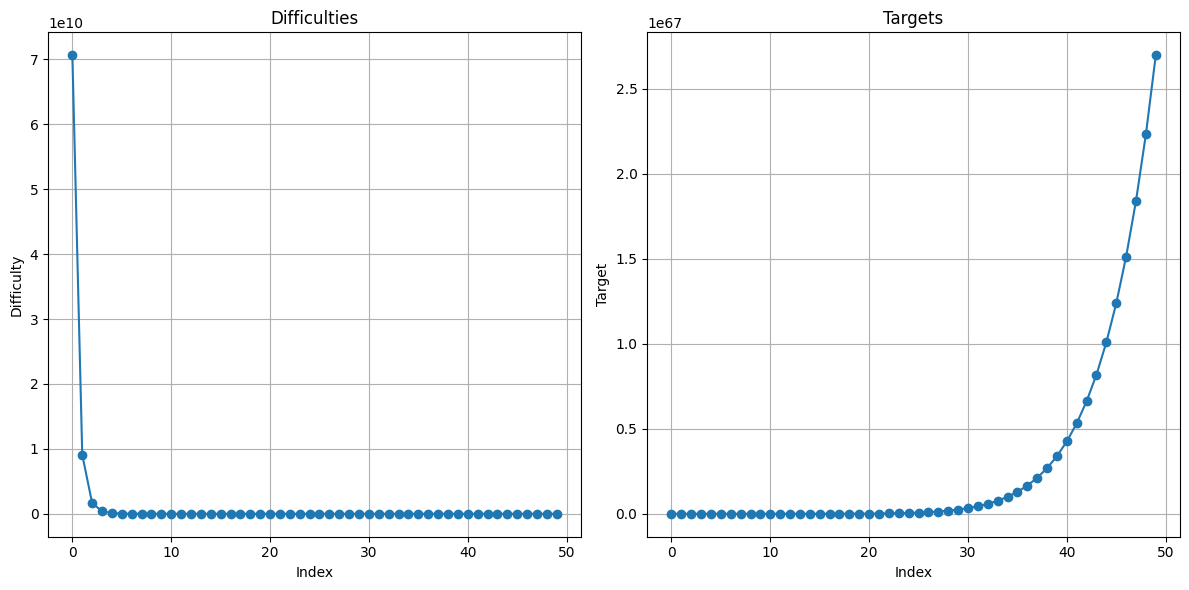

In [53]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the data on both subplots
x_difficulty = np.arange(len(block_difficulties))
x_target = np.arange(len(block_difficulties))

# Plot on the first subplot
ax1.plot(x_difficulty, block_difficulties, marker='o', linestyle='-')
ax1.set_xlabel('Index')
ax1.set_ylabel('Difficulty')
ax1.set_title('Difficulties')
ax1.grid(True)

# Plot on the second subplot
ax2.plot(x_target, block_targets, marker='o', linestyle='-')
ax2.set_xlabel('Index')
ax2.set_ylabel('Target')
ax2.set_title('Targets')
ax2.grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [54]:
num_levels = 20  # Levels from 0 to 20
levels = range(num_levels)

# Function to calculate the probability of success for a given level
def calculate_probability(row, level):
    return row['Success'] / 2**level


# Create a DataFrame to store the results for each level
level_data = {}

for level in range(num_levels):
    level_data[level] = df.apply(lambda row: calculate_probability(row, level), axis=1)

# Create a new DataFrame with the results
level_df = pd.DataFrame(level_data)

# Concatenate the original DataFrame with the new level DataFrame
result_df = pd.concat([df, level_df], axis=1)

# Print the resulting DataFrame
print(result_df)

          Target    Difficulty       Success             0             1  \
0   3.816890e+56  7.063327e+10  3.296331e-12  3.296331e-12  1.648165e-12   
1   2.970032e+57  9.077324e+09  2.564970e-11  2.564970e-11  1.282485e-11   
2   1.628362e+58  1.655648e+09  1.406281e-10  1.406281e-10  7.031404e-11   
3   6.967726e+58  3.869261e+08  6.017445e-10  6.017445e-10  3.008723e-10   
4   2.478526e+59  1.087741e+08  2.140496e-09  2.140496e-09  1.070248e-09   
5   7.641390e+59  3.528147e+07  6.599233e-09  6.599233e-09  3.299616e-09   
6   2.101966e+60  1.282607e+07  1.815293e-08  1.815293e-08  9.076464e-09   
7   5.268284e+60  5.117406e+06  4.549779e-08  4.549779e-08  2.274889e-08   
8   1.222118e+61  2.206003e+06  1.055441e-07  1.055441e-07  5.277206e-08   
9   2.655696e+61  1.015174e+06  2.293504e-07  2.293504e-07  1.146752e-07   
10  5.457040e+61  4.940397e+05  4.712792e-07  4.712792e-07  2.356396e-07   
11  1.068354e+62  2.523504e+05  9.226482e-07  9.226482e-07  4.613241e-07   
12  2.004936

In [55]:
# List of columns to keep
desired_columns = ['Difficulty'] + list(levels)

# Create a new DataFrame with only the desired columns
heatmap_df = result_df[desired_columns].copy()

# Select all columns except 'Difficulty' for normalization
cols_to_normalize = heatmap_df.columns.difference(['Difficulty'])


heatmap_df.set_index('Difficulty', inplace=True)

print(heatmap_df)

                         0             1             2             3  \
Difficulty                                                             
7.063327e+10  3.296331e-12  1.648165e-12  8.240827e-13  4.120414e-13   
9.077324e+09  2.564970e-11  1.282485e-11  6.412425e-12  3.206213e-12   
1.655648e+09  1.406281e-10  7.031404e-11  3.515702e-11  1.757851e-11   
3.869261e+08  6.017445e-10  3.008723e-10  1.504361e-10  7.521807e-11   
1.087741e+08  2.140496e-09  1.070248e-09  5.351241e-10  2.675621e-10   
3.528147e+07  6.599233e-09  3.299616e-09  1.649808e-09  8.249041e-10   
1.282607e+07  1.815293e-08  9.076464e-09  4.538232e-09  2.269116e-09   
5.117406e+06  4.549779e-08  2.274889e-08  1.137445e-08  5.687223e-09   
2.206003e+06  1.055441e-07  5.277206e-08  2.638603e-08  1.319302e-08   
1.015174e+06  2.293504e-07  1.146752e-07  5.733761e-08  2.866880e-08   
4.940397e+05  4.712792e-07  2.356396e-07  1.178198e-07  5.890990e-08   
2.523504e+05  9.226482e-07  4.613241e-07  2.306620e-07  1.153310

<Axes: ylabel='Difficulty'>

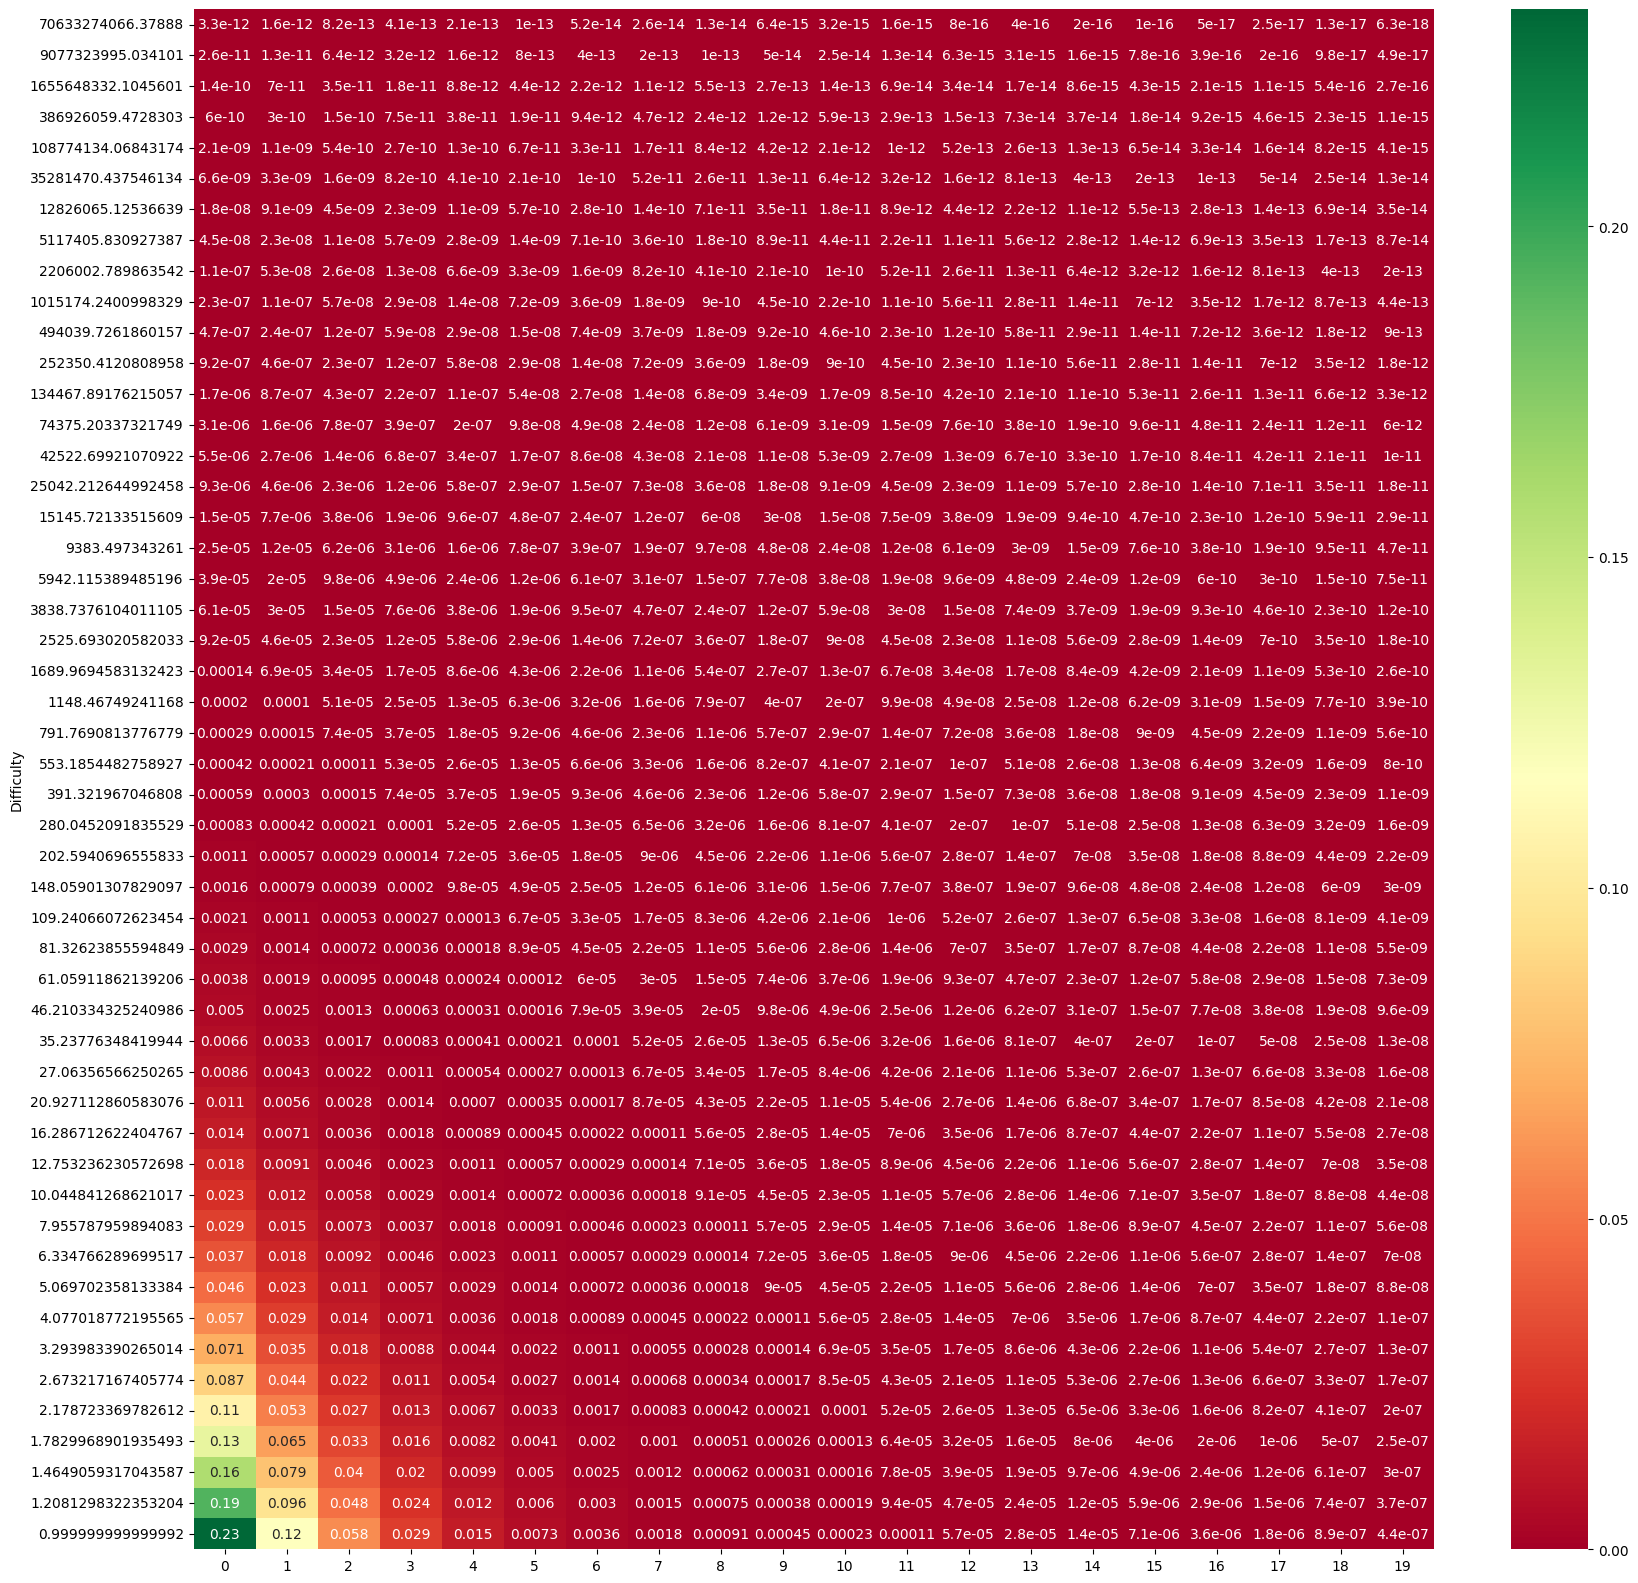

In [56]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(heatmap_df, cmap='RdYlGn', annot=True)